<h1>Employee Attrition Classification</h1>

<p>The Synthetic Employee Attrition Dataset is a simulated dataset designed for the analysis and prediction of employee attrition. It contains detailed information about various aspects of an employee's profile, including demographics, job-related features, and personal circumstances.

The dataset comprises 74,498 samples, split into training and testing sets to facilitate model development and evaluation. Each record includes a unique Employee ID and features that influence employee attrition. The goal is to understand the factors contributing to attrition and develop predictive models to identify at-risk employees.

This dataset is ideal for HR analytics, machine learning model development, and demonstrating advanced data analysis techniques. It provides a comprehensive and realistic view of the factors affecting employee retention, making it a valuable resource for researchers and practitioners in the field of human resources and organizational development.</p>

<h2>1.Training Datasets</h2>

In [26]:
import employee_attrition_classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

const = employee_attrition_classification.base()
const.train_data()

,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,overtime,...,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
0,31,1,19,0,5390,0,2,0,2,0,...,0,1,1,89,0,0,0,0,2,1
1,59,0,4,3,5534,3,0,3,3,0,...,3,1,1,21,0,0,0,1,1,1
2,24,0,10,2,8159,2,0,3,0,0,...,3,1,1,74,0,0,0,3,1,1
3,36,0,7,0,3989,2,0,2,1,0,...,2,1,2,50,1,0,0,2,2,1
4,56,1,41,0,4821,1,3,0,0,1,...,0,2,1,68,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,0,12,0,4414,1,0,0,1,1,...,2,2,2,35,0,0,1,3,3,0
59594,18,1,4,2,8040,1,0,2,3,0,...,0,2,1,73,0,0,0,1,2,0
59595,22,0,14,4,7944,1,0,2,0,1,...,2,0,2,29,0,1,0,2,2,1
59596,23,1,8,0,2931,1,3,0,0,0,...,0,0,0,9,0,0,0,2,1,0


<h2>2.Model Training</h2>

<h3>1) Logistic Regression</h3>

In [4]:
data = const.train_data()
data2 = const.test_data()

train_data = data.drop(columns=['attrition'])
train_label = data['attrition']
test_data = data2.drop(columns=['attrition'])
test_label = data2['attrition']

model = LogisticRegression(max_iter=50000)
#scaler = MinMaxScaler(copy=True,feature_range=(0,1))
#scaler = StandardScaler()
#scaler.fit(train_data)
##test_scaled = scaler.transform(test_data)
#pca = PCA(n_components=20)
#pca.fit(train_scaled)
#X_pca = pca.transform(train_data)
#pca.fit(test_scaled)
#test_pca = pca.transform(test_data)

#model.fit(train_scaled,train_label)
model.fit(train_data,train_label)

test_data = data2.drop(columns=['attrition'])
test_label = data2['attrition']

print("Test score: {:2f}".format(model.score(test_data,test_label)))


Test score: 0.717315


<h3>2) SVC</h3>

In [21]:
svc_model = SVC()
#scaler = MinMaxScaler()
svc_model.fit(train_data,train_label)
print("Test score:{:2f}".format(svc_model.score(test_data,test_label)))


Test score:0.528054


<h3>3) Decision Tree</h3>

In [59]:
tree_model = DecisionTreeClassifier()
scaler = MinMaxScaler(copy=True,feature_range=(0,1))
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)
tree_model.fit(train_scaled,train_label)
print("Test score:{:2f}".format(tree_model.score(test_scaled,test_label)))

Test score:0.666174


<h3>4) Neural Network</h3>

In [60]:
neuro_model = MLPClassifier(solver='lbfgs',random_state=42,max_iter=50000)
neuro_model.fit(train_data,train_label)
print("Test score: {:2f}".format(neuro_model.score(test_data,test_label)))

Test score: 0.477785


C:\Users\Pipis\orbe_work2\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<h3>5) GradientBoostingClassifier</h3>

In [5]:
gbrt_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=300,max_depth=5,random_state=0)

gbrt_model.fit(train_data,train_label)
print("Test score: {:2f}".format(gbrt_model.score(test_data,test_label)))


Test score: 0.756577


array([0.01739738, 0.02638307, 0.02975864, 0.00215906, 0.03240102,
       0.09745086, 0.01618591, 0.01084369, 0.04155193, 0.0088121 ,
       0.04604903, 0.03192951, 0.18892148, 0.03366065, 0.23293036,
       0.00451648, 0.01978338, 0.11997926, 0.00109243, 0.0013057 ,
       0.03365255, 0.00323552])

<h3>5)-1 GradientBoostingClassifier Feature Importance</h3>

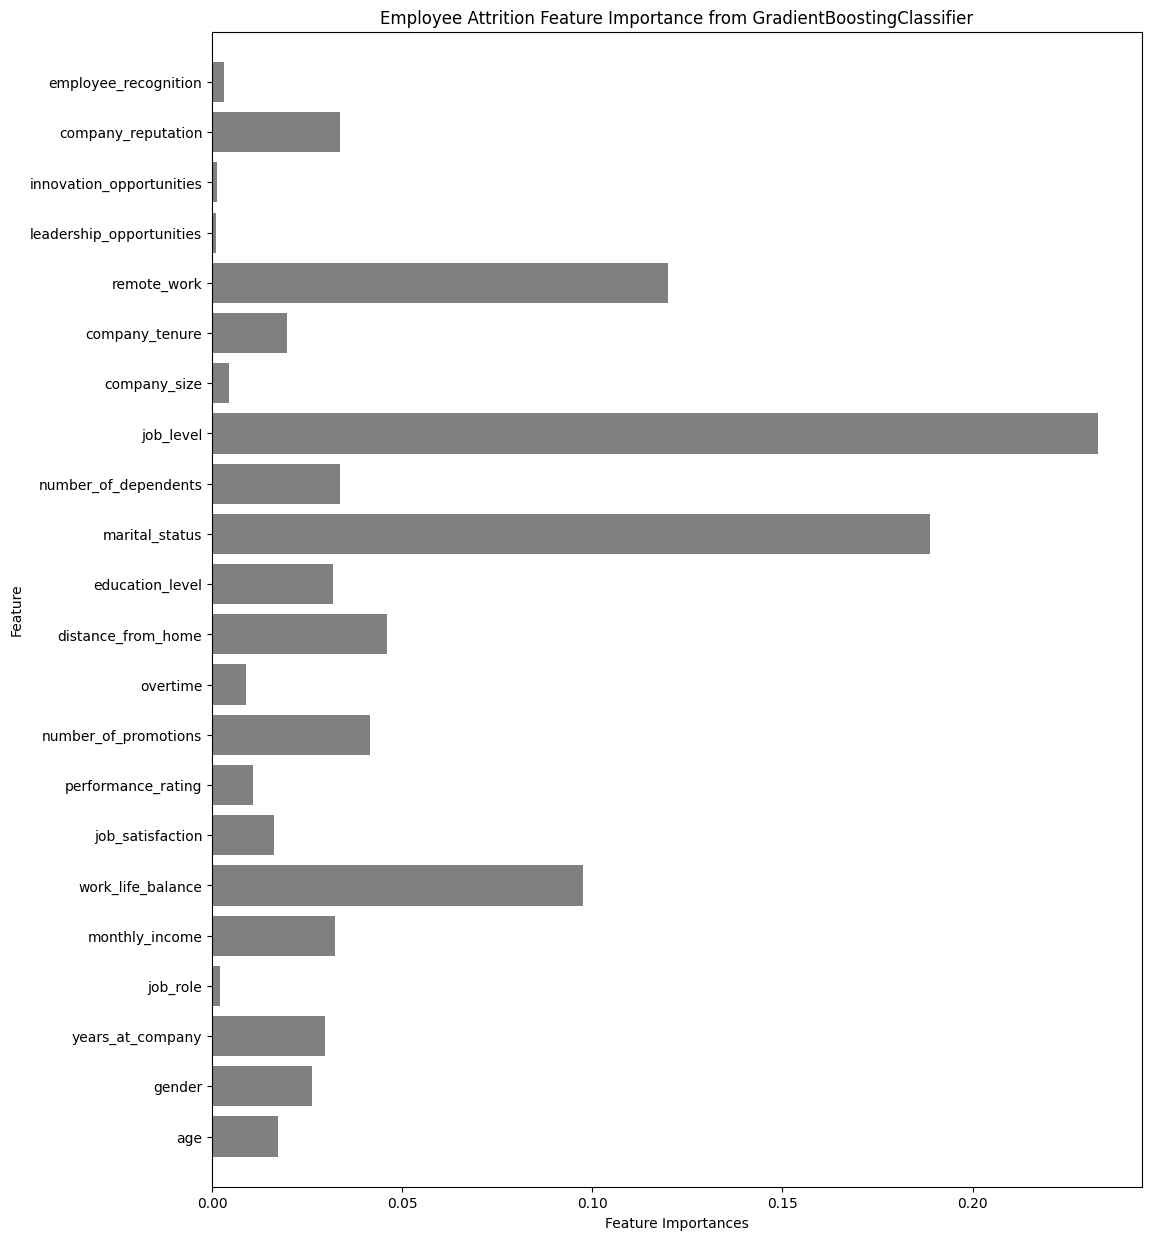

In [58]:
gbrt_model.feature_importances_
#df = pd.DataFrame({'feature':train_data.columns,'importances':gbrt_model.feature_importances_})
fig,ax = plt.subplots(1,1,figsize=(12,15))
ax.barh(np.arange(len(train_data.columns)),gbrt_model.feature_importances_,align='center',color='grey')
ax.set_yticks(np.arange(len(train_data.columns)),train_data.columns)
ax.set_xlabel('Feature Importances')
ax.set_ylabel('Feature')
ax.set_ylim(-1,len(train_data.columns))
ax.set_title('Employee Attrition Feature Importance from GradientBoostingClassifier')
plt.show()

<h3>5)-2 GradientBoostingClassifier Accuracy</h3>

In [56]:
pred = gbrt_model.predict(test_data)
#accuracy_score(test_data,pred)
accuracy_score(test_label,pred)

0.7565771812080537

<h3>6) Random Forest Classifier</h3>

In [18]:
forest_model = RandomForestClassifier(n_estimators=100,random_state=0)
scaler = MinMaxScaler(copy=True,feature_range=(0,1))
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)
forest_model.fit(train_data,train_label)
print("Test score: {:2f}".format(forest_model.score(test_data,test_label)))
forest_model.feature_importances_

Test score: 0.746242


array([0.07151413, 0.01505894, 0.07111335, 0.0318708 , 0.08347965,
       0.04333938, 0.02701052, 0.02521801, 0.03783919, 0.01322193,
       0.08627423, 0.04144035, 0.08558736, 0.04306677, 0.09822728,
       0.02343766, 0.07837295, 0.04807348, 0.00563463, 0.0108887 ,
       0.03045407, 0.0288766 ])

<h3>6)-1 Random Forest Classifier Feature Importance</h3>

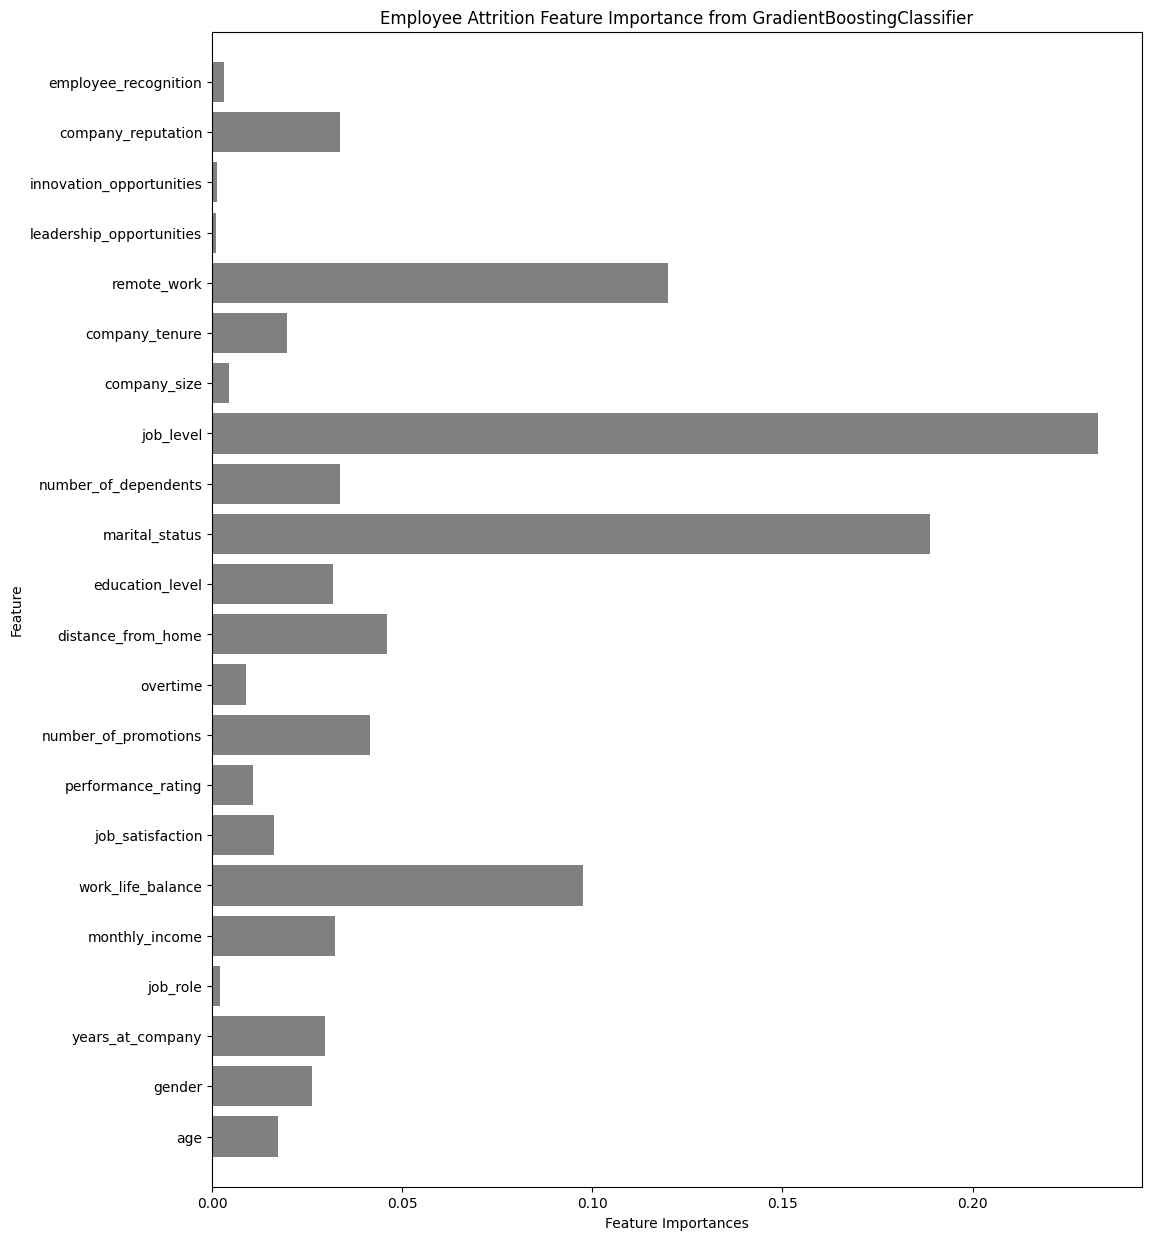

In [59]:
forest_model.feature_importances_
#df = pd.DataFrame({'feature':train_data.columns,'importances':gbrt_model.feature_importances_})
fig,ax = plt.subplots(1,1,figsize=(12,15))
ax.barh(np.arange(len(train_data.columns)),gbrt_model.feature_importances_,align='center',color='grey')
ax.set_yticks(np.arange(len(train_data.columns)),train_data.columns)
ax.set_xlabel('Feature Importances')
ax.set_ylabel('Feature')
ax.set_ylim(-1,len(train_data.columns))
ax.set_title('Employee Attrition Feature Importance from GradientBoostingClassifier')
plt.show()